# FIFA PLAYER PRICE PREDICTION

Authors :

- Daniel FU : fu.2121690@studenti.uniroma1.it / Matricola : 2121690
- Marvin BERGER : berger.2117502@studenti.uniroma1.it / Matricola : 2117502
- Lukas WEIGMANN : weigmann.2117702@studenti.uniroma1.it / Matricola : 2117702
- Srinjan GHOSH : ghosh.2053796@studenti.uniroma1.it / Matricola : 2053796
- Agnese LORELLI : lorelli.1966415@studenti.uniroma1.it / Matricola : 1966415

## Abstract

## Introduction

This is the final project of the course **"Foundations of Data Science"**. Our goal is to predict the market value of a player in the game FIFA. We chose this topic because of our interest in soccer and the fact that the data for the FIFA games is very closely related to market data from reality. This way we can develop an approach for predicting players' market values while still having a lot of other data on top for experimenting. We found a Dataset on **Kaggle** : ​​​[FIFA](https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset?select=male_players.csv). This dataset contains players' characteristics from FIFA 15 to FIFA 23, it has 110 features and over 1 million instances.
We want to optimize several models on the prediction of the player price, compare the models considering the resulting Root Mean Squared Error and R^2 values and be able to make conclusion about the importance of the features for such a prediction.

## Team assignments

We decided to split the workload :

- Daniel FU : XGBoost + Feature Importance
- Marvin BERGER : Feature Engineering + Linear Regression
- Lukas WEIGMANN : Feature Engineering + Linear Regression + Plot
- Srinjan GHOSH : Feature Engineering + Linear and Polynomial Regression
- Agnese LORELLI : Decision Tree + Random Forest

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 1. Dataset Loading and Pre-processing

In [3]:
DATASET_PATH = "./male_players.csv"
dataset_df = pd.read_csv(DATASET_PATH)
dataset_df.head()

/var/folders/nh/3_7mpjj50cj494n6nfn7c77h0000gn/T/ipykernel_35718/3223005786.py:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df = pd.read_csv(DATASET_PATH)


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/230009,23,9,2023-01-13,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,...,63+3,63+3,64+3,59+3,50+3,50+3,50+3,59+3,19+3,https://cdn.sofifa.net/players/158/023/23_120.png
1,165153,/player/165153/karim-benzema/230009,23,9,2023-01-13,K. Benzema,Karim Benzema,"CF, ST",91,91,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,https://cdn.sofifa.net/players/165/153/23_120.png
2,188545,/player/188545/robert-lewandowski/230009,23,9,2023-01-13,R. Lewandowski,Robert Lewandowski,ST,91,91,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/23_120.png
3,192985,/player/192985/kevin-de-bruyne/230009,23,9,2023-01-13,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,79+3,79+3,78+3,74+3,68+3,68+3,68+3,74+3,21+3,https://cdn.sofifa.net/players/192/985/23_120.png
4,231747,/player/231747/kylian-mbappe/230009,23,9,2023-01-13,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png


Lets have a look at the columns we have to work with

In [4]:
dataset_df.columns.to_list()

['player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'fifa_update_date',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'league_id',
 'league_name',
 'league_level',
 'club_team_id',
 'club_name',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_bal

We have to deal with **Feature Engineering** because the dataset has too many features, we need to reduce it:
Taking the mean of the related attributes in order to form a summary of each attribute.

In [5]:
dataset_df['attacking_mean'] = np.mean(dataset_df[['attacking_crossing',
                                       'attacking_finishing',
                                       'attacking_heading_accuracy',
                                       'attacking_short_passing',
                                       'attacking_volleys']], axis=1)

dataset_df['skill_mean'] = np.mean(dataset_df[['skill_dribbling',
                                   'skill_curve',
                                   'skill_fk_accuracy',
                                   'skill_long_passing',
                                   'skill_ball_control']], axis=1)

dataset_df['movement_mean'] = np.mean(dataset_df[['movement_acceleration',
                                      'movement_sprint_speed',
                                      'movement_agility',
                                      'movement_reactions',
                                      'movement_balance']], axis=1)

dataset_df['power_mean'] = np.mean(dataset_df[['power_shot_power',
                                   'power_jumping',
                                   'power_stamina',
                                   'power_strength',
                                   'power_long_shots']], axis=1)

dataset_df['mentality_mean'] = np.mean(dataset_df[['mentality_aggression',
                                       'mentality_interceptions',
                                       'mentality_positioning',
                                       'mentality_vision',
                                       'mentality_penalties',
                                       'mentality_composure']], axis=1)

dataset_df['defending_mean'] = np.mean(dataset_df[['defending_marking_awareness',
                                       'defending_standing_tackle',
                                       'defending_sliding_tackle']], axis=1)

dataset_df['goalkeeping_mean'] = np.mean(dataset_df[['goalkeeping_diving',
                                         'goalkeeping_handling',
                                         'goalkeeping_kicking',
                                         'goalkeeping_positioning',
                                         'goalkeeping_reflexes',
                                         'goalkeeping_speed']], axis=1)

columns_to_remove = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                      'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                      'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                      'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                      'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
                      'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
                      'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
                      'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
                      'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
                      'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
                      'goalkeeping_reflexes', 'goalkeeping_speed']

# Remove the original columns
dataset_df.drop(columns=columns_to_remove, inplace=True)

# Display the modified DataFrame
dataset_df.head()


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,rb,gk,player_face_url,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean,goalkeeping_mean
0,158023,/player/158023/lionel-messi/230009,23,9,2023-01-13,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,...,59+3,19+3,https://cdn.sofifa.net/players/158/023/23_120.png,84.6,92.8,88.2,76.6,73.666667,26.333333,10.8
1,165153,/player/165153/karim-benzema/230009,23,9,2023-01-13,K. Benzema,Karim Benzema,"CF, ST",91,91,...,60+3,18+3,https://cdn.sofifa.net/players/165/153/23_120.png,86.8,81.8,80.2,82.0,76.166667,28.333333,8.2
2,188545,/player/188545/robert-lewandowski/230009,23,9,2023-01-13,R. Lewandowski,Robert Lewandowski,ST,91,91,...,61+3,19+3,https://cdn.sofifa.net/players/188/545/23_120.png,85.8,81.6,80.6,84.6,80.500000,32.000000,10.2
3,192985,/player/192985/kevin-de-bruyne/230009,23,9,2023-01-13,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,74+3,21+3,https://cdn.sofifa.net/players/192/985/23_120.png,82.0,88.4,78.8,81.8,82.166667,61.000000,11.2
4,231747,/player/231747/kylian-mbappe/230009,23,9,2023-01-13,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png,82.2,80.8,92.2,82.0,74.166667,30.666667,8.4


We use label encoding to encode categorical variables which might decide the market value of a player

In [6]:
dataset_df['preferred_foot'] = LabelEncoder().fit_transform(dataset_df['preferred_foot'])
dataset_df['work_rate'] = LabelEncoder().fit_transform(dataset_df['work_rate'])
dataset_df['body_type'] = LabelEncoder().fit_transform(dataset_df['body_type'])

Let's have a look at the values of the changed attrbiutes

In [ ]:
dataset_df[['preferred_foot', 'work_rate', 'body_type']]

Let's now visualize how the attributes might be correlated with our dependent variable **value_eur**.

/Users/srinjanghosh/miniconda3/envs/fds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/srinjanghosh/miniconda3/envs/fds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/srinjanghosh/miniconda3/envs/fds/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Correlation of Column value_eur with Other Columns')

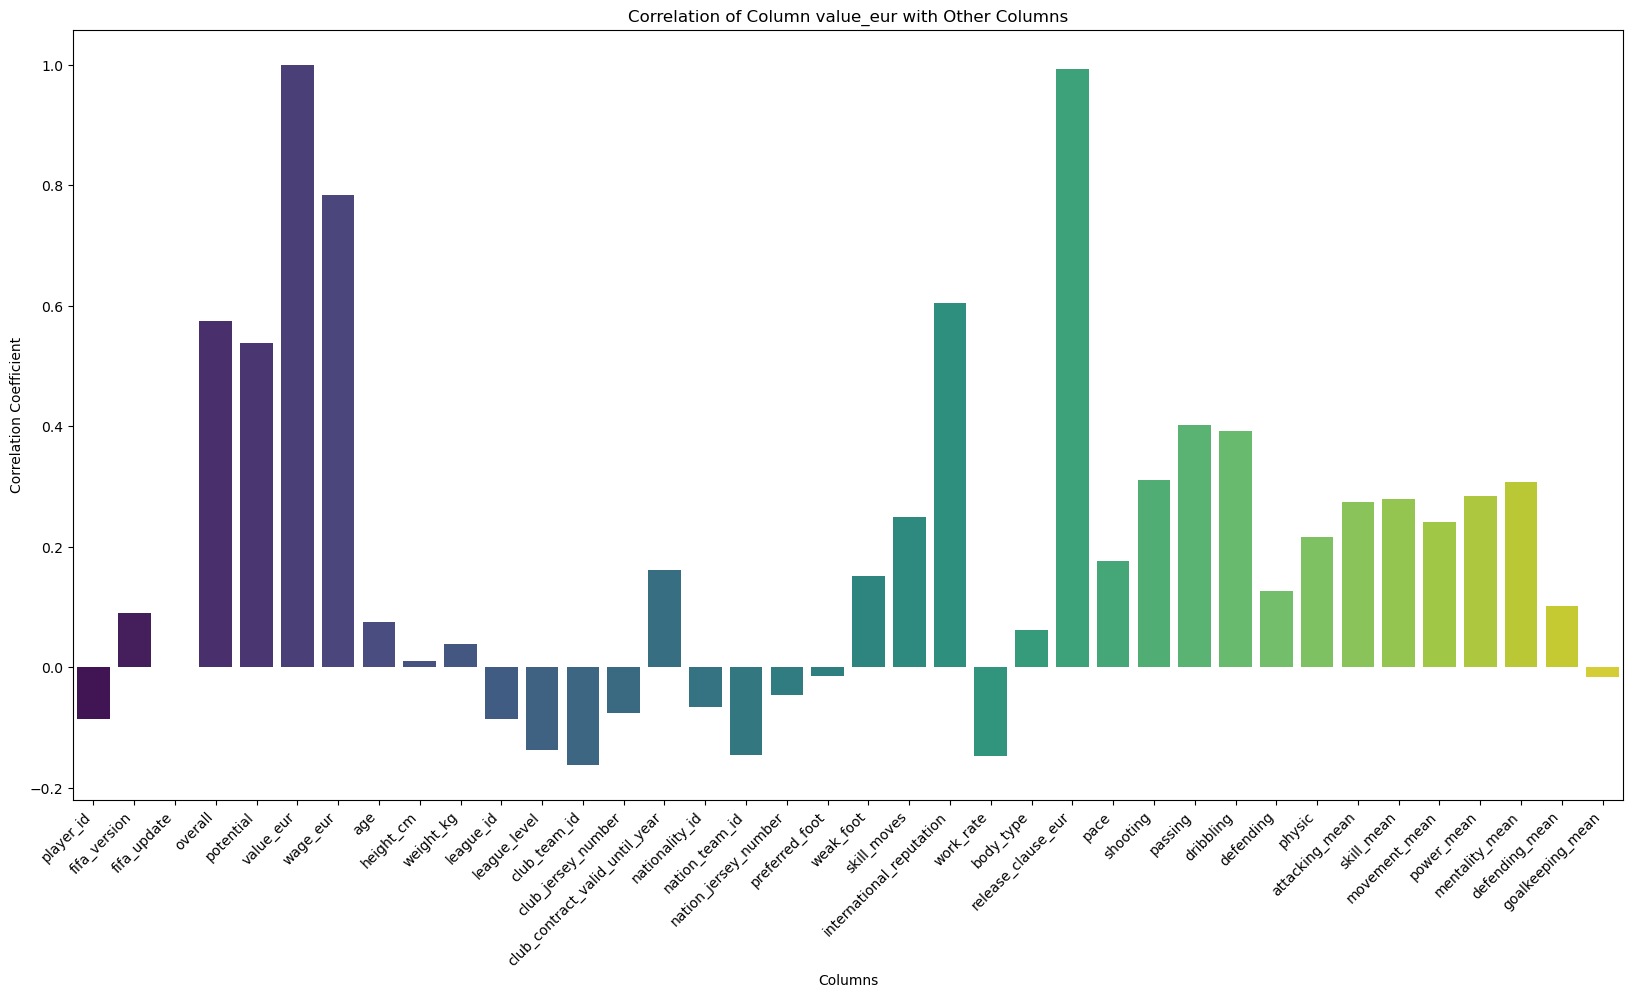

In [8]:
selected_column = 'value_eur'

correlations= dataset_df.corrwith(dataset_df[selected_column], numeric_only=True)


plt.figure(figsize=(20, 10))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.xticks(rotation=45, ha="right")

# Set plot labels and title
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation of Column {selected_column} with Other Columns')

Notice that some features disappeared, it has removed features whose values are String (e.g. player_url, player_face_url ...). We have now **39 features**

Let's remove the uncessary columns above a particular threshold

In [12]:
def keepOnlyDataOverAThreshold(data, selected_column, threshold):
    correlations = dataset_df.corrwith(dataset_df[selected_column], numeric_only=True)
    columns_to_keep = correlations[correlations.abs()>threshold].index.to_list()
    columns_to_delete = list(set(dataset_df.columns.to_list()) - set(columns_to_keep))
    return data.drop(columns=columns_to_delete)

In [13]:
dataset_df = keepOnlyDataOverAThreshold(dataset_df, 'value_eur', 0.1)
dataset_df.head()

,overall,potential,value_eur,wage_eur,league_level,club_team_id,club_contract_valid_until_year,nation_team_id,weak_foot,skill_moves,...,passing,dribbling,defending,physic,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean
0,91,91,54000000.0,195000.0,1.0,73.0,2023.0,1369.0,4,4,...,90.0,94.0,34.0,64.0,84.6,92.8,88.2,76.6,73.666667,26.333333
1,91,91,64000000.0,450000.0,1.0,243.0,2023.0,NaN,4,4,...,83.0,87.0,39.0,78.0,86.8,81.8,80.2,82.0,76.166667,28.333333
2,91,91,84000000.0,420000.0,1.0,241.0,2025.0,1353.0,4,4,...,79.0,86.0,44.0,83.0,85.8,81.6,80.6,84.6,80.500000,32.000000
3,91,91,107500000.0,350000.0,1.0,10.0,2025.0,1325.0,5,4,...,93.0,87.0,63.0,77.0,82.0,88.4,78.8,81.8,82.166667,61.000000
4,91,95,190500000.0,230000.0,1.0,73.0,2024.0,1335.0,4,5,...,80.0,92.0,36.0,76.0,82.2,80.8,92.2,82.0,74.166667,30.666667


In [14]:
dataset_df.shape

(10003590, 25)

Let's remove all the rows which have N/A values --> **250k instances**

In [15]:
dataset_df = dataset_df.dropna()

In [16]:
dataset_df.shape

(242956, 25)

We drop this feature because it has too much correlation with the target (almost 1) and thus we want to avoid a scenario where we predict a player price basically already using the market value. It has been a debate inside the team if we should keep it or not, but thanks to our results, we know that it is better to remove it.

In [17]:
dataset_df = dataset_df.drop(columns="release_clause_eur")

Let's scale the dataset

In [18]:
from sklearn.preprocessing import StandardScaler

columns = dataset_df.columns.to_list()

scaler = StandardScaler()
dataset_df[columns] = scaler.fit_transform(dataset_df[columns])

dataset_df.head()

,overall,potential,value_eur,wage_eur,league_level,club_team_id,club_contract_valid_until_year,nation_team_id,weak_foot,skill_moves,...,passing,dribbling,defending,physic,attacking_mean,skill_mean,movement_mean,power_mean,mentality_mean,defending_mean
0,2.519552,1.996863,1.997707,2.450759,-0.306742,-0.509122,0.654471,-0.525043,1.033704,1.451021,...,2.362914,2.381919,-1.457136,-0.991061,2.326984,2.579284,1.875310,1.008086,1.174331,-1.637561
2,2.519552,1.996863,3.523617,6.168126,-0.306742,-0.505230,1.702788,-0.525400,1.033704,1.451021,...,1.218671,1.543173,-0.891854,1.381656,2.457943,1.519709,1.014020,2.198524,2.095098,-1.349836
3,2.519552,1.996863,4.718914,5.011612,-0.306742,-0.510581,1.702788,-0.526024,2.419850,1.451021,...,2.674980,1.648016,0.182182,0.632377,2.043240,2.163022,0.810031,1.781871,2.319675,0.122639
4,2.519552,2.640849,8.940598,3.029016,-0.306742,-0.509122,1.178630,-0.525801,1.033704,2.769523,...,1.322693,2.172232,-1.344080,0.507497,2.065066,1.444025,2.328620,1.811632,1.241704,-1.417536
11,2.188912,1.674870,4.617186,3.194232,-0.306742,-0.510396,1.178630,-0.526180,2.419850,0.132520,...,1.634759,1.228643,-0.722269,1.256776,2.457943,1.406183,0.266059,2.198524,2.229845,-0.875936


## 2. Training Various Models

We decided to use 4 approaches for our task.
First we wanted to use regression. We expect the regression to maybe not perform that well since we have a lot of features that are not really correlated with our label. However we have a lot of features and training data.
Furthermore we decided to use regression trees. In the first variant we only want to train one regression tree for prediction and in the second variant a Random Forest of regression trees. Especially the random forest we expect to perform well.
Lastly we use a gradient boosting model. Again we expect it to perform very well.


First let's perform the train test split

In [19]:
y = dataset_df["value_eur"]
X = dataset_df.drop("value_eur", axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train}")
print(f"Test data shape: {X_test}")

Training data shape:           overall  potential  wage_eur  league_level  club_team_id  \
5410182  0.205073   0.225901  0.055122     -0.306742     -0.468933   
3157350 -0.125567  -0.418085  0.055122     -0.306742     -0.467289   
4906844 -0.125567   0.225901 -0.110094     -0.306742     -0.510511   
3247683  1.362313   0.869887  1.459461     -0.306742     -0.509770   
5894729  0.535713   0.869887  1.211636     -0.306742     -0.505230   
...           ...        ...       ...           ...           ...   
3397587 -0.290886  -0.740078 -0.539657      2.556185     -0.465598   
2971185  1.196993   0.708891  0.220338     -0.306742     -0.500134   
3716367 -0.952166  -1.062071 -0.523135      2.556185     -0.465598   
4098663 -1.282806  -0.418085 -0.721395     -0.306742      2.063654   
3453311 -0.125567   0.869887 -0.589222     -0.306742     -0.495224   

         club_contract_valid_until_year  nation_team_id  weak_foot  \
5410182                       -0.393846        1.784823  -0.352442  

#### 2.1. Linear Regression

In [21]:
def linearReg(X_train, X_test, y_train, y_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print(f'Mean Squared Error: {mse}')
  print(f'Root Mean Squared Error: {rmse}')
  print(f'R-squared: {r2}')

  return rmse,r2

In [22]:
rmse_lin,r2_lin = linearReg(X_train, X_test, y_train, y_test)

Mean Squared Error: 0.23386675158166678
Root Mean Squared Error: 0.4835977166836779
R-squared: 0.7672698481890075


#### 2.2. Stochastic Gradient Descent Regressor

In [23]:
def sgdRegressor(X_train, X_test, y_train, y_test, iterations):
  model = SGDRegressor(max_iter=iterations)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print(f'Mean Squared Error: {mse}')
  print(f'Root Mean Squared Error: {rmse}')
  print(f'R-squared: {r2}')

In [24]:
sgdRegressor(X_train, X_test, y_train, y_test, 10000)

Mean Squared Error: 0.23452673559175274
Root Mean Squared Error: 0.48427960476542137
R-squared: 0.766613071721975


#### 2.3. Polynomial Regression

In [25]:
small_X = X
poly_features = PolynomialFeatures(degree=3, include_bias=False)\
                                            .fit_transform(small_X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

Linear Regression with polynomial features

In [26]:
linearReg(X_train, X_test, y_train, y_test)

Mean Squared Error: 0.029998657800751505
Root Mean Squared Error: 0.1732012061180623
R-squared: 0.9701471366199871


(0.1732012061180623, 0.9701471366199871)

Stochastic Regression with polynomial features

In [28]:
sgdRegressor(X_train, X_test, y_train, y_test, iterations=10000)

Mean Squared Error: 3.083032144197967e+25
Root Mean Squared Error: 5552505870503.846
R-squared: -3.068048510977865e+25


### 2.4. Regression Tree

Let's first reinitialize the train and test datasets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

#test the regressor
y_reg = regressor.predict(X_test)

# evaluate model
rmse_DT = mean_squared_error(y_test, y_reg, squared=False)
r2_DT = r2_score(y_test, y_reg)
print(f'RMSE= {rmse_DT}, R2= {r2_DT}')

RMSE= 0.017444533151279817, R2= 0.9996971672277494


In [31]:
label_encoder = LabelEncoder()
x_categorical = dataset_df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = dataset_df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor_rf = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor_rf.fit(X_train, y_train)

#test the regressor
y_reg_rf = regressor_rf.predict(X_test)

# evaluate model
rmse_RF = mean_squared_error(y_test, y_reg_rf, squared=False)
r2_RF = r2_score(y_test, y_reg_rf)
print(f'RMSE= {rmse_RF}, R2= {r2_RF}')

RMSE= 0.01588137141823719, R2= 0.9997490078290878


/Users/srinjanghosh/miniconda3/envs/fds/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


### 2.5. XGBoost

In [32]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}

# Create a XGBRegressor instance
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_xgb_model.predict(X_test)

# Metrics
rmse_xgb = mean_squared_error(y_test, y_pred_best, squared=False)
r2_xgb = r2_score(y_test, y_pred_best)

print(f"RMSE: {rmse_xgb}")
print(f"R² Score: {r2_xgb}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
RMSE: 0.11235471302513583
R² Score: 0.9874377694644857


### 2.5.1 Feature Importance

                           Feature  Importance
0                          overall    0.607334
1                        potential    0.109431
5   club_contract_valid_until_year    0.043645
7                        weak_foot    0.027669
12                        shooting    0.024442
20                      power_mean    0.019368
4                     club_team_id    0.017697
19                   movement_mean    0.016859
14                       dribbling    0.016113
17                  attacking_mean    0.015707
22                  defending_mean    0.014595
21                  mentality_mean    0.012990
11                            pace    0.012748
15                       defending    0.012283
13                         passing    0.008248
18                      skill_mean    0.007261
8                      skill_moves    0.007036
9         international_reputation    0.006506
2                         wage_eur    0.005437
6                   nation_team_id    0.005097
10           

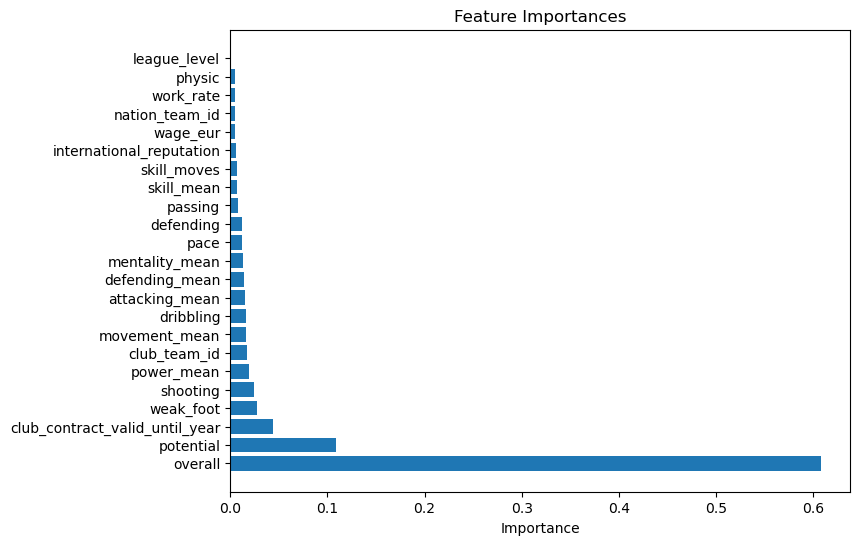

In [35]:
#Use Matplotlib and Importance

import matplotlib.pyplot as plt

# Get Importances from features
feature_importances = best_xgb_model.feature_importances_

# X axis
feature_names = X.columns 

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by value (descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot graph
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

## 3. Results and Metrics

### Feature importance
We consider the feature importances of the gradient boosting model. By far the most important feature is the overall value which is a FIFA game specific value. The most important features after this one are potential, the remaining time the contract at the club is valid, the weak foot and shooting ability.

### Model errors
In the following plots we can see the Random Mean Squared Error and the R^2 values of all models compared. The linear regression performed the worst with RMSE of almost 0.5 and R^2 of around 0.8. Gradient boosting had a RMSE of around 0.1 and R^2 of almost 1. The Regression tree and Random Forest performed the best with an extremely low RMSE and R^2 even higher than the one of the Gradient Boosting model.


In [36]:
# Function to plot performance measures
# Params: values as list, title, categories as list
def plotMeasures(values, title, categories):
    values = np.array(values)
    bar_width = 0.2

    for i in range(len(categories)):
        plt.bar(i * bar_width, values[i], width=bar_width, label=categories[i])


    plt.xticks([])
    plt.xlabel('Model')
    plt.title(title)


    plt.legend(loc='lower center')
    plt.show()

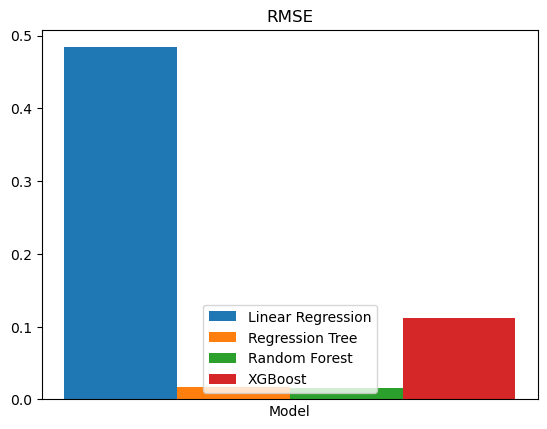

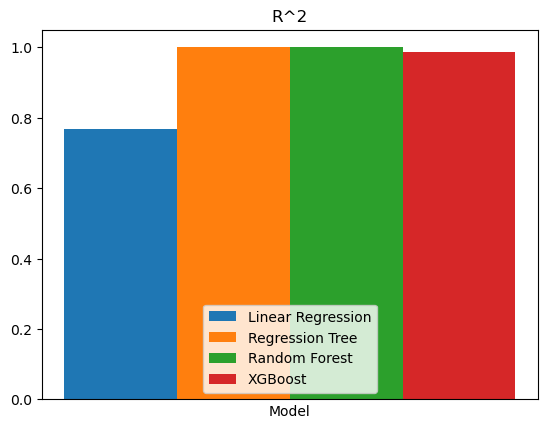

In [37]:
plotMeasures([rmse_lin, rmse_DT, rmse_RF,rmse_xgb], 'RMSE', ['Linear Regression', 'Regression Tree', 'Random Forest','XGBoost'])
plotMeasures([r2_lin, r2_DT, r2_RF,r2_xgb], 'R^2', ['Linear Regression', 'Regression Tree', 'Random Forest','XGBoost'])

## Conclusion
We obtained really good results for predicting the market value of the FIFA players. Especially the Random Forest performed extraordinarily well. However we could also observe that the most important feature for the Gradient Boosting was the value 'overall' with an importance of over 0.6. This is a very specific ingame value that was again derived by developers from the player's statistics (such as also market price) just for the game. Considering this fact the very good results might be attributed to the fact that it's data for a video game. Hypothetically using the same approach on real life FIFA data only would maybe not lead to such low error rates. However, the general approach that we developed within this project can be used for similar predictions of continuos values.